Imports

Imports

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

%matplotlib inline

Read Data

In [12]:
file = pd.ExcelFile(r"../../../../data/final/Handball_09.03.2023_fertig.xlsx")

file.sheet_names

df = file.parse('3. League')

# drop last col comments & favorite corner & empy rows at end
df = df.iloc[:, :-2]
df.columns

Index(['Home team', 'Guest team', 'Matchday', 'Player 3rd league',
       'Shooter team', 'club region', 'Game Minute',
       'Difference between\nfinal whistle and kickoff \n(in seconds)',
       'Home Goal', 'Guest Goal',
       'Goalkeeper position\n(0 = on the line;\n 1 = in front of the line)',
       'Toss successful?\n(0 = no; 1 = yes;\n 2 = yes, afterthrow',
       'Left/right \nhanded?\n(1 = right; 2 = left)', 'Throw direction',
       'Pressure situation?\n(0 = no; \n1= Goalkeeper change;\n2 = last 7 meter held; 3 = goal difference < 4 + from 50. minute; 4 = 1+2; 5 = 1+3; 6 = 2+3; 7 = 1+2+3; 8 = last 7 meter successful in follow-up throw\n',
       'Number of seven meters\n(of the player)',
       'Throw quadrant last 7 meter',
       'last 7 meter successful?\n(0 = no; 1 = yes; \n2 = yes, in the afterthrow'],
      dtype='object')

Cleanup & Renaming

In [13]:
df.replace('unklar', np.nan,inplace=True)
df.replace('unklar ', np.nan,inplace=True)
df.replace('fehlend', np.nan,inplace=True)
df.replace('-', np.nan,inplace=True)
df.replace(-99, np.nan,inplace=True)
df.replace('-99', np.nan,inplace=True)
df.replace('?', np.nan,inplace=True)
df.replace('?!', np.nan,inplace=True)
#df.dropna(inplace=True)
df.columns = [ 'homeTeam','opponentTeam','day','name','team','region','playTime',
              'whistleThrowTime','homeGoals','opponentGoals',
              'goalKeeperPosition',
              'throwSuccess','LRHandy','throwDirection',
              'pressureSituation','noOfThrowsFromPlayer',
              'throwQuadrantLastThrow','lastThrowSuccess']
df = df.astype({'homeTeam':'string', 'opponentTeam':'string','day':'float16','name':'string','team':'string','region':'string','playTime':'float16',
              'whistleThrowTime':'float16','homeGoals':'float16','opponentGoals':'float16','goalKeeperPosition':'float16',
              'throwSuccess':'float16','LRHandy':'float16','throwDirection':'float16','pressureSituation':'float16','noOfThrowsFromPlayer':'float16',
              'throwQuadrantLastThrow':'float16','lastThrowSuccess':'float16', })
df

,homeTeam,opponentTeam,day,name,team,region,playTime,whistleThrowTime,homeGoals,opponentGoals,goalKeeperPosition,throwSuccess,LRHandy,throwDirection,pressureSituation,noOfThrowsFromPlayer,throwQuadrantLastThrow,lastThrowSuccess
0,TV Emsdetten,ASV Hamm-Westfalen II,1.0,<NA>,<NA>,west,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HLZ Ahlener SG,TV Emsdetten,2.0,<NA>,<NA>,west,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TV Emsdetten,VfL Gladbeck,3.0,HRS,TV Emsdetten,west,2.0,23.0,0.0,0.0,1.0,1.0,1.0,8.0,0.0,1.0,NaN,1.0
3,TV Emsdetten,VfL Gladbeck,3.0,HRS,TV Emsdetten,west,7.0,16.0,5.0,1.0,1.0,1.0,1.0,3.0,0.0,2.0,8.0,1.0
4,TV Emsdetten,VfL Gladbeck,3.0,HRS,TV Emsdetten,west,31.0,28.0,19.0,9.0,1.0,1.0,1.0,7.0,0.0,3.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,Stralsunder HV,DHK Flensborg,19.0,SKL,Stralsunder HV,north,6.0,23.0,3.0,2.0,1.0,1.0,1.0,4.0,0.0,1.0,NaN,NaN
1015,Stralsunder HV,DHK Flensborg,19.0,SKL,Stralsunder HV,north,29.0,20.0,20.0,14.0,1.0,1.0,1.0,3.0,0.0,2.0,4.0,1.0
1016,Stralsunder HV,DHK Flensborg,19.0,SKL,Stralsunder HV,north,49.0,36.0,28.0,22.0,1.0,0.0,1.0,3.0,0.0,3.0,3.0,1.0
1017,Stralsunder HV,DHK Flensborg,19.0,SKL,Stralsunder HV,north,29.0,20.0,20.0,14.0,1.0,1.0,1.0,3.0,0.0,2.0,4.0,1.0


In [14]:
np.set_printoptions(threshold=sys.maxsize)
players = df.name.to_numpy()
players = players[~pd.isnull(players)]
print(np.unique(players))

['BCT' 'BERD' 'BHD' 'BHL' 'BKRD' 'BRB' 'BRMS' 'BRN' 'CDS' 'CLSMND' 'DBS'
 'DHJS' 'DJCS' 'FDMS' 'FHLC' 'FLGS' 'GKAS' 'GSTR' 'GSU' 'HGNR' 'HNSM'
 'HOL' 'HRH' 'HRL' 'HRS' 'HVM' 'Jusys' 'KBLR' 'KDG' 'KLB' 'KNGR' 'KSW'
 'KTS' 'Kern' 'LJA' 'MBD' 'MCZ' 'MHCN' 'MKNL' 'MNL' 'MPYL' 'MSDFS' 'NHS'
 'NRL' 'NVS' 'PCH' 'PDWS' 'PLC' 'PSV' 'RHFL' 'RMV' 'RSDM' 'Repusic'
 'Ritter' 'SBHG' 'SCFG' 'SCHTD' 'SCHVNM' 'SCTM' 'SFRT' 'SGDNDR' 'SGLRf'
 'SGR' 'SKL' 'SLFD' 'SMD' 'SPS' 'SRWJ' 'STM' 'SWRG' 'SZ' 'TBRSH' 'TRN'
 'TRS' 'UBK' 'XLM' 'zGT']


Throw Direction

In [15]:
df1 = df.loc[df['name'] == 'PSV',('throwDirection','throwSuccess')] #df['name'] == ''
df1.dropna(inplace=True)
df1['throwSuccess'].replace(to_replace=2.0, value=1.0, inplace=True)

df17 = pd.crosstab(df1['throwDirection'], df1['throwSuccess']).reset_index()
df17 = df17.iloc[:, [0,2,1]]

#add = pd.DataFrame({1.0:[0.0],
 #                   0.0:[0.0],"throwDirection":[5.0]})

#df17 = df17.append(add)
df17

throwSuccess,throwDirection,1.0,0.0
0,3.0,3,0
1,7.0,2,1
2,8.0,2,1
3,9.0,1,0


In [16]:
df18 = df1['throwDirection'].sort_values().value_counts(sort=False)
gc = df18.to_numpy().squeeze()
gc = (gc/gc.sum())*100
gc = gc.tolist()
gc = [ float('%.2f' % elem) for elem in gc ]
#for i in [2,3,4,5,6,7,8]:    
#    gc.insert(i-1,0)
gc

[30.0, 30.0, 30.0, 10.0]

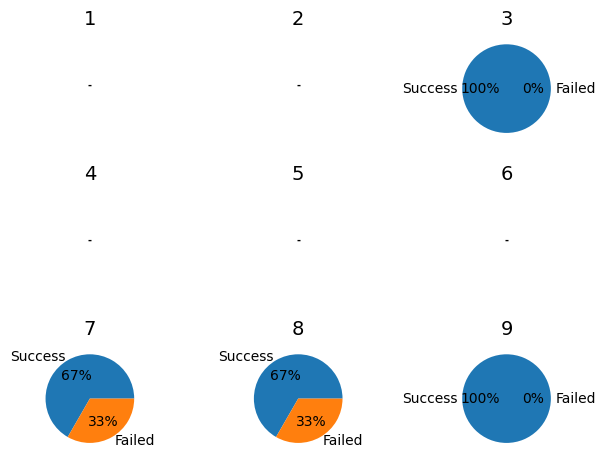

In [17]:
# Some data
labels = 'Success', 'Failed'

# Make figure and axes
fig, axs = plt.subplots(3, 3)
fig.tight_layout()
idx1 = 1
for x in range(3):
    for y in range(3):
        data = df17.loc[df17['throwDirection'] == idx1,(1.0,0.0)].to_numpy()
        data = data.squeeze().tolist()
        if data:
            axs[x, y].pie(data, labels=labels, autopct='%.0f%%' )
        else:
            gc.insert(idx1-1,0)
            axs[x, y].text(0.5, 0.5, '-', horizontalalignment='center', size='x-small', color='black', weight='semibold')
        axs[x, y].set_title(idx1, fontsize=14)
        axs[x, y].axis('off')
        idx1+=1



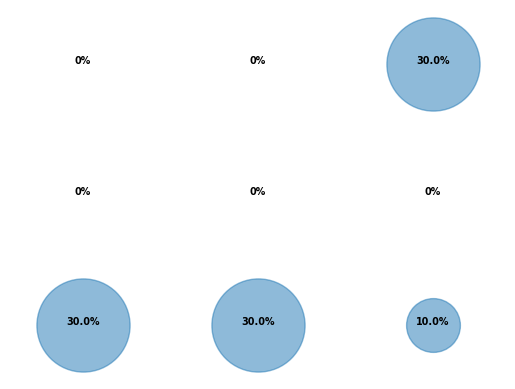

In [18]:

# Make figure and axes
fig, axs = plt.subplots(3, 3)

indx = 0

for x in range(3):
    for y in range(3):
        lbl = str(gc[indx]) +'%'
        axs[x, y].text(0.5, 0.5, lbl, horizontalalignment='center', size='x-small', color='black', weight='semibold')
        axs[x, y].axis('off')
        axs[x, y].scatter([0.5], [0.5],
                 alpha=0.5,
                 s = gc[indx]*150)
        indx+=1
        
plt.show()